In [45]:
"../data/sra_metadata/ihme_top_5_sra_metadata.csv.gz"

'../data/sra_metadata/ihme_top_5_sra_metadata.csv.gz'

In [2]:
import pandas

In [3]:
sra_metadata = pandas.read_csv('../data/sra_metadata/ihme_top_5_sra_metadata.csv.gz')

C:\Users\Z_Z\AppData\Local\Temp\ipykernel_17192\4080406264.py:1: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  sra_metadata = pandas.read_csv('../data/sra_metadata/ihme_top_5_sra_metadata.csv.gz')


In [4]:
absence_of_country_metadata_bool = (sra_metadata['geo_loc_name_country_calc'].isna()) | (sra_metadata['geo_loc_name_country_calc'] == 'uncalculated')

without_country_data = sra_metadata[absence_of_country_metadata_bool]['organism'].value_counts()
without_country_data.name = 'SRA lacks country metadata'

with_country_data = sra_metadata[~absence_of_country_metadata_bool]['organism'].value_counts()
with_country_data.name = 'SRA has country metadata'

country_metadata = pandas.concat([with_country_data, without_country_data], axis=1)

In [5]:
country_metadata['Total'] = country_metadata.sum(axis=1)

In [6]:
country_metadata['SRA has country metadata percentage'] = country_metadata['SRA has country metadata']/country_metadata['Total']*100 

In [7]:
country_metadata['SRA lacks country metadata percentage'] = country_metadata['SRA lacks country metadata']/country_metadata['Total']*100

In [8]:
country_metadata

,SRA has country metadata,SRA lacks country metadata,Total,SRA has country metadata percentage,SRA lacks country metadata percentage
Escherichia coli,210619,79865,290484,72.506231,27.493769
Mycobacterium tuberculosis,71942,69954,141896,50.700513,49.299487
Staphylococcus aureus,58553,48765,107318,54.560279,45.439721
Klebsiella pneumoniae,42935,28583,71518,60.033838,39.966162
Streptococcus pneumoniae,23486,75029,98515,23.840024,76.159976


In [9]:
import seaborn

In [64]:
organism = ['Escherichia coli', 'Mycobacterium tuberculosis', 'Staphylococcus aureus', 'Klebsiella pneumoniae', 'Streptococcus pneumoniae']

In [79]:
country_metadata['organism'] = country_metadata.index
print(country_metadata.head())

                            SRA has country metadata  \
Escherichia coli                              210619   
Mycobacterium tuberculosis                     71942   
Staphylococcus aureus                          58553   
Klebsiella pneumoniae                          42935   
Streptococcus pneumoniae                       23486   

                            SRA lacks country metadata  \
Escherichia coli                                 79865   
Mycobacterium tuberculosis                       69954   
Staphylococcus aureus                            48765   
Klebsiella pneumoniae                            28583   
Streptococcus pneumoniae                         75029   

                                              organism  
Escherichia coli                      Escherichia coli  
Mycobacterium tuberculosis  Mycobacterium tuberculosis  
Staphylococcus aureus            Staphylococcus aureus  
Klebsiella pneumoniae            Klebsiella pneumoniae  
Streptococcus pneumoniae     

In [11]:
import matplotlib.pyplot as plt

<Figure size 2000x400 with 0 Axes>

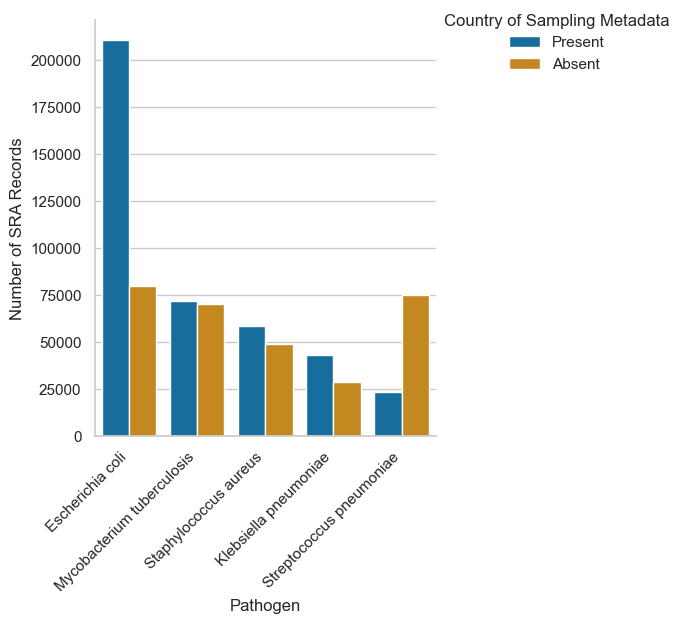

In [53]:
melt_df = country_metadata[['SRA has country metadata', 'SRA lacks country metadata']].reset_index().rename(columns={'index': 'Pathogen',
                                                                                                                     'SRA has country metadata': "Present",
                                                                                                                    'SRA lacks country metadata': "Absent"})

melt_df = pandas.melt(melt_df, id_vars=['Pathogen'], var_name='Country of Sampling Metadata', value_name='Number of SRA Records')

seaborn.set_style('whitegrid')
seaborn.set_palette('colorblind')
seaborn.set_context('notebook')

plt.figure(figsize=(20, 4))
plot = seaborn.catplot(data=melt_df, kind='bar', y='Number of SRA Records', x='Pathogen', hue='Country of Sampling Metadata')
plot.set_xticklabels(rotation=45, ha="right")
seaborn.move_legend(plot, loc=1)
plt.savefig('metadata_status.png', dpi=300, bbox_inches='tight')

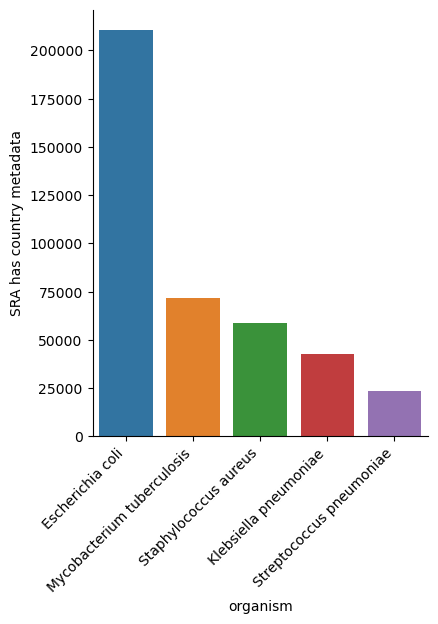

<Figure size 2000x400 with 0 Axes>

In [90]:
mycatplot = seaborn.catplot(data=country_metadata, kind="bar", y="SRA has country metadata", x="organism")
plt.figure(figsize=(20, 4))
mycatplot.set_xticklabels(rotation=45, ha="right")

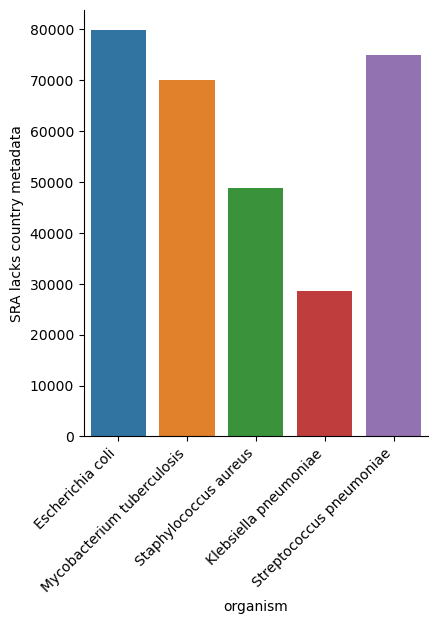

In [91]:
mycatplot = seaborn.catplot(data=country_metadata, kind="bar", y="SRA lacks country metadata", x="organism")
mycatplot.set_xticklabels(rotation=45, ha="right")